# Student Alcohol Consumption Analysiss

## Introduction
This Jupyter Notebook aims to analyze the factors influencing alcohol consumption among secondary school students. By exploring the dataset, we will gain insights into how various social, educational, and personal factors affect students' alcohol consumption patterns and academic performance.

## Table of Contents
1. [Package Installation](#package-installation)
2. [Library Imports](#library-imports)
3. [Data Loading](#data-loading)
4. [Initial Data Exploration](#initial-data-exploration)
5. [Data Visualization](#data-visualization)
6. [Correlation Analysis](#correlation-analysis)
7. [Data Preparation](#data-preparation)
8. [Modeling](#modeling)
9. [Model Evaluation](#model-evaluation)
10. [Conclusion and Next Steps](#conclusion-and-next-steps)

## Package Installation <a name="package-installation"></a>
In this cell, we will install the necessary Python packages required for our data analysis project. This step ensures that all the libraries needed for data manipulation, visualization, and machine learning are available in our environment. 

We will use the `pip` command to install the following libraries:

- **NumPy**: A library for numerical computations and handling arrays.
- **Pandas**: A powerful data manipulation and analysis library, particularly useful for working with structured data.
- **Matplotlib**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: A statistical data visualization library based on Matplotlib that provides a high-level interface for drawing attractive graphics.
- **Scikit-learn**: A machine learning library that provides simple and efficient tools for data mining and data analysis.

In [177]:
# List of required libraries
required_libraries = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'scikit-learn'
]

def install(package):
    """Install the package using pip in a Jupyter Notebook."""
    print(f"Installing {package}...")
    # Use the Jupyter magic command for installation
    get_ipython().system(f'pip install {package}')

def check_libraries(libraries):
    """Check if the libraries are installed and install them if necessary."""
    missing_libraries = []

    for library in libraries:
        try:
            __import__(library)
        except ImportError:
            missing_libraries.append(library)
        except Exception as e:
            # Captura outros erros que podem ocorrer durante a importação
            print(f"Error importing {library}: {e}")
            missing_libraries.append(library)

    if missing_libraries:
        print(f"The following libraries are missing: {', '.join(missing_libraries)}")
        print("Starting installation...")

        installation_success = True  # Flag to track installation success

        for library in missing_libraries:
            try:
                install(library)
                print(f"{library} installed successfully.")
            except Exception as e:
                print(f"Failed to install {library}: {e}")
                installation_success = False  # Mark as failed if there was an error

        # Check again if the libraries were installed
        for library in missing_libraries:
            try:
                __import__(library)
            except ImportError:
                print(f"Error: {library} was not installed correctly.")
                installation_success = False  # Mark as failed if still missing

        # Final message based on installation success
        if installation_success:
            print("All libraries were installed successfully.")
        else:
            print("Some libraries were not installed correctly.")
    else:
        print("All libraries are already installed.")

if __name__ == "__main__":
    check_libraries(required_libraries)

The following libraries are missing: scikit-learn
Starting installation...
Installing scikit-learn...
scikit-learn installed successfully.
Error: scikit-learn was not installed correctly.
Some libraries were not installed correctly.


## Library Imports <a name="library-imports"></a>
In this cell, we will import all the necessary libraries that we will use throughout the analysis. This includes libraries for data manipulation, visualization, and machine learning.

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Loading <a name="data-loading"></a>
Here, we will load the dataset containing information about students' alcohol consumption and related factors. We will examine the structure of the data and check for any initial issues such as missing values.

In [179]:
# Paths to the CSV files
path_data = '../data/amazon_product.csv'

# Reading the CSV files
df = pd.read_csv(path_data)

In [180]:
# Display the first few rows of each dataset to verify the reading
print("Mathematics Data:")
print(df.head())


Mathematics Data:
   Unnamed: 0        asin                                      product_title  \
0           0  B0BQ118F2T  Moto G Play 2023 3-Day Battery Unlocked Made f...   
1           1  B0CTD47P22  SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...   
2           2  B0CHH6X6H2  Total by Verizon | Samsung Galaxy A03s | Locke...   
3           3  B0BZ9XNBRB  Google Pixel 7a - Unlocked Android Cell Phone ...   
4           4  B0CN1QSH8Q  SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...   

  product_price product_original_price currency  product_star_rating  \
0        $99.99                $169.99      USD                  4.0   
1       $149.74                $158.00      USD                  4.2   
2        $49.88                    NaN      USD                  3.9   
3       $335.00                $499.00      USD                  4.3   
4       $199.99                    NaN      USD                  4.1   

   product_num_ratings                           product_url  \
0   

In [181]:
# Check for duplicate values in the 'Unnamed: 0' column
# duplicated() returns a boolean Series indicating if each row is a duplicate
# any() checks if there are any True values in the Series
has_duplicates = df['Unnamed: 0'].duplicated().any()

# If there are no duplicates, we assume this column is an ID column
if not has_duplicates:
    print("The 'Unnamed: 0' column has no duplicates. Removing it from the DataFrame.")
    # Drop the 'Unnamed: 0' column from the DataFrame
    df.drop(columns=['Unnamed: 0'], inplace=True)
else:
    print("The 'Unnamed: 0' column has duplicates and will not be removed.")

The 'Unnamed: 0' column has no duplicates. Removing it from the DataFrame.


In [182]:
# List of columns to be removed as they are not relevant for the analysis
columns_to_remove = ['product_url', 'product_photo', 'asin','currency']

# Remove the specified columns from the DataFrame
df.drop(columns=columns_to_remove, inplace=True)

# Display the DataFrame after removing the irrelevant columns
print("Updated DataFrame after removing irrelevant columns:")
print(df.head(5))  # Displays the first 5 rows of the remaining columns

Updated DataFrame after removing irrelevant columns:
                                       product_title product_price  \
0  Moto G Play 2023 3-Day Battery Unlocked Made f...        $99.99   
1  SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...       $149.74   
2  Total by Verizon | Samsung Galaxy A03s | Locke...        $49.88   
3  Google Pixel 7a - Unlocked Android Cell Phone ...       $335.00   
4  SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...       $199.99   

  product_original_price  product_star_rating  product_num_ratings  \
0                $169.99                  4.0                 2929   
1                $158.00                  4.2                  135   
2                    NaN                  3.9                  205   
3                $499.00                  4.3                 2248   
4                    NaN                  4.1                  423   

   product_num_offers product_minimum_offer_price  is_best_seller  \
0                  10               

In [183]:
# Using shape to check the dimensions of the combined DataFrame
print("\nShape of Combined Data:", df.shape)


Shape of Combined Data: (64, 17)


## Initial Data Exploration <a name="initial-data-exploration"></a>
In this section, we will perform an exploratory data analysis (EDA) to understand the dataset better. We will look at the data types, summary statistics, and any missing values, which will help us determine the next steps for cleaning and preparing the data.

In [184]:
# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 product_title                   0
product_price                   0
product_original_price         37
product_star_rating            10
product_num_ratings             0
product_num_offers              0
product_minimum_offer_price     0
is_best_seller                  0
is_amazon_choice                0
is_prime                        0
climate_pledge_friendly         0
sales_volume                    3
delivery                        1
has_variations                  0
product_availability           63
unit_price                     59
unit_count                     59
dtype: int64


In [185]:
# List of columns to be removed based on the analysis
columns_to_remove = ['product_original_price', 'product_availability', 'unit_price', 'unit_count']

# Remove the specified columns from the DataFrame
df.drop(columns=columns_to_remove, inplace=True)

# Identify and remove observations with missing values in 'delivery' and 'sales_volume'
df = df.dropna(subset=['delivery', 'sales_volume'])

# Display the shape of the DataFrame after all modifications
print(f"The following columns were removed from the DataFrame: {columns_to_remove}.")
print("Observations with missing values in 'delivery' and 'sales_volume' were also removed.")
print(f"Shape of the DataFrame after these modifications: {df.shape}.")

The following columns were removed from the DataFrame: ['product_original_price', 'product_availability', 'unit_price', 'unit_count'].
Observations with missing values in 'delivery' and 'sales_volume' were also removed.
Shape of the DataFrame after these modifications: (60, 13).


In [186]:
# Check the data types of each column in the DataFrame
print("Data Types of Each Column:")
print(df.dtypes)

# For a more organized view, you can use the .info() method
print("\nDetailed Information about the DataFrame:")
print(df.info())

Data Types of Each Column:
product_title                   object
product_price                   object
product_star_rating            float64
product_num_ratings              int64
product_num_offers               int64
product_minimum_offer_price     object
is_best_seller                    bool
is_amazon_choice                  bool
is_prime                          bool
climate_pledge_friendly           bool
sales_volume                    object
delivery                        object
has_variations                    bool
dtype: object

Detailed Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 63
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_title                60 non-null     object 
 1   product_price                60 non-null     object 
 2   product_star_rating          53 non-null     float64
 3   product_num_rati

In [187]:
# Convert columns to numeric types
df['product_price'] = pd.to_numeric(df['product_price'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')
df['product_minimum_offer_price'] = pd.to_numeric(df['product_minimum_offer_price'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Convert categorical columns
df['delivery'] = df['delivery'].astype('category')
df['product_title'] = df['product_title'].astype('category')
df['sales_volume'] = df['sales_volume'].astype('category')

df['is_best_seller'] = df['is_best_seller'].astype('category')
df['is_amazon_choice'] = df['is_amazon_choice'].astype('category')
df['is_prime'] = df['is_prime'].astype('category')
df['climate_pledge_friendly'] = df['climate_pledge_friendly'].astype('category')
df['has_variations'] = df['has_variations'].astype('category')

# Check the data types after conversion
print("Data Types after Conversion:")
print(df.dtypes)

# If necessary, you can also check the amount of missing values in the columns
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

Data Types after Conversion:
product_title                  category
product_price                   float64
product_star_rating             float64
product_num_ratings               int64
product_num_offers                int64
product_minimum_offer_price     float64
is_best_seller                 category
is_amazon_choice               category
is_prime                       category
climate_pledge_friendly        category
sales_volume                   category
delivery                       category
has_variations                 category
dtype: object

Missing Values in Each Column:
product_title                  0
product_price                  0
product_star_rating            7
product_num_ratings            0
product_num_offers             0
product_minimum_offer_price    0
is_best_seller                 0
is_amazon_choice               0
is_prime                       0
climate_pledge_friendly        0
sales_volume                   0
delivery                       0
has_varia

In [188]:
# 4. Summary statistics for numerical columns
summary_statistics = df.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
        product_price  product_star_rating  product_num_ratings  \
count      60.000000            53.000000         6.000000e+01   
mean       58.284000             4.235849         5.553442e+04   
std        94.262335             0.559909         1.623535e+05   
min         0.000000             1.800000         0.000000e+00   
25%         0.430000             4.100000         9.550000e+01   
50%        23.085000             4.400000         1.620000e+03   
75%        67.957500             4.600000         1.720100e+04   
max       499.000000             4.800000         1.015448e+06   

       product_num_offers  product_minimum_offer_price  
count           60.000000                    60.000000  
mean             5.116667                    50.635167  
std              8.352594                    78.479502  
min              1.000000                     0.000000  
25%              1.000000                     0.430000  
50%              1.000000                

In [189]:
# 5. Check unique values in categorical columns, excluding 'product_title'
for column in df.select_dtypes(include=['category']).columns:
    if column != 'product_title':  # Ignore the 'product_title' column
        print(f"\nUnique Values in '{column}':\n", df[column].value_counts())


Unique Values in 'is_best_seller':
 is_best_seller
False    37
True     23
Name: count, dtype: int64

Unique Values in 'is_amazon_choice':
 is_amazon_choice
False    58
True      2
Name: count, dtype: int64

Unique Values in 'is_prime':
 is_prime
True     37
False    23
Name: count, dtype: int64

Unique Values in 'climate_pledge_friendly':
 climate_pledge_friendly
False    57
True      3
Name: count, dtype: int64

Unique Values in 'sales_volume':
 sales_volume
Other formats:                6
10K+ bought in past month     6
2K+ bought in past month      5
3K+ bought in past month      5
List:                         4
500+ bought in past month     3
1K+ bought in past month      2
Other format:                 2
40K+ bought in past month     2
50+ bought in past month      2
100K+ bought in past month    1
Jul 8, 2015                   1
Jun 24, 2021                  1
Jun 26, 2024                  1
Oct 27, 2011                  1
Mar 20, 2024                  1
May 30, 2024          

In [190]:
# Example of categorizing sales_volume
def categorize_sales_volume(value):
    if 'K+' in value:
        return 'High Sales'
    elif '100+' in value or '500+' in value:
        return 'Medium Sales'
    else:
        return 'Low Sales'

# Apply the categorization function
df['sales_volume_category'] = df['sales_volume'].apply(categorize_sales_volume)

# Simplify the delivery column
df['delivery_simple'] = df['delivery'].apply(lambda x: 'Free' if 'FREE' in x else 'Paid')

# Convert the new columns to 'category' type
df['sales_volume_category'] = df['sales_volume_category'].astype('category')
df['delivery_simple'] = df['delivery_simple'].astype('category')

# Print the unique values of the new columns
for column in df[['sales_volume_category', 'delivery_simple']].columns:
    print(f"\nUnique Values in '{column}':\n", df[column].value_counts())


Unique Values in 'sales_volume_category':
 sales_volume_category
Low Sales       31
High Sales      26
Medium Sales     3
Name: count, dtype: int64

Unique Values in 'delivery_simple':
 delivery_simple
Free    42
Paid    18
Name: count, dtype: int64


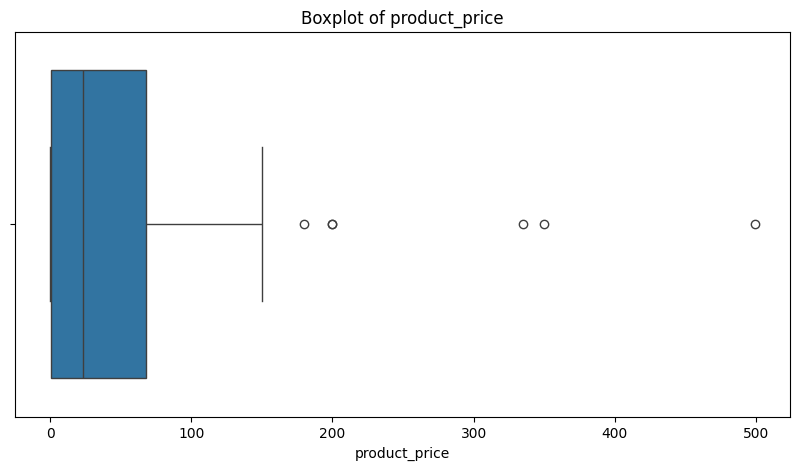

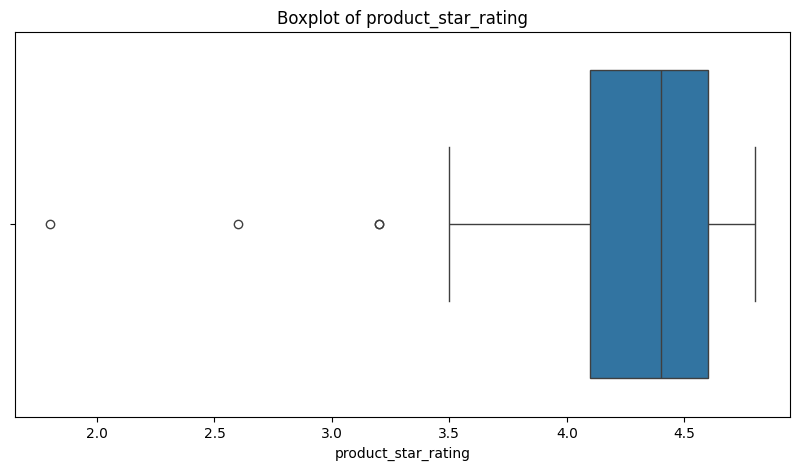

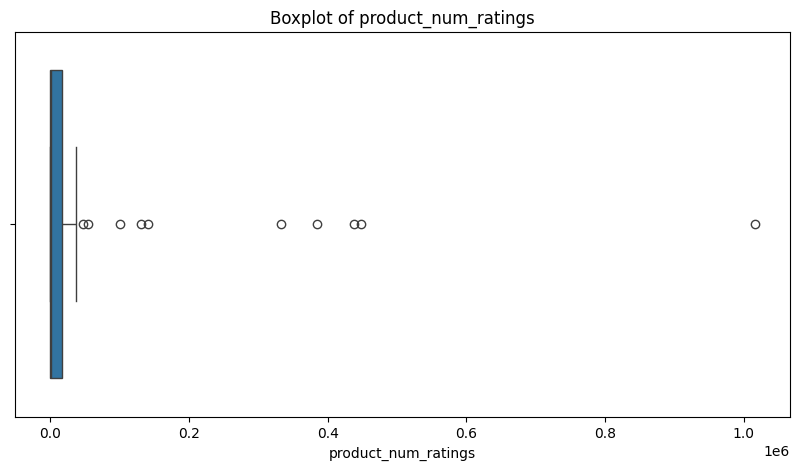

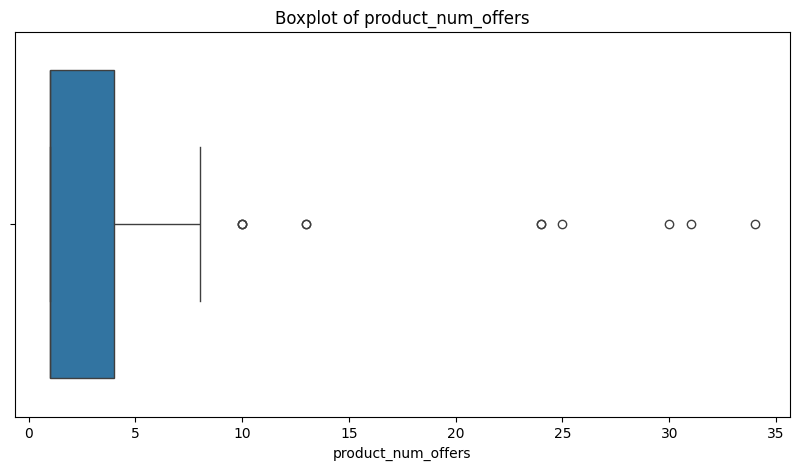

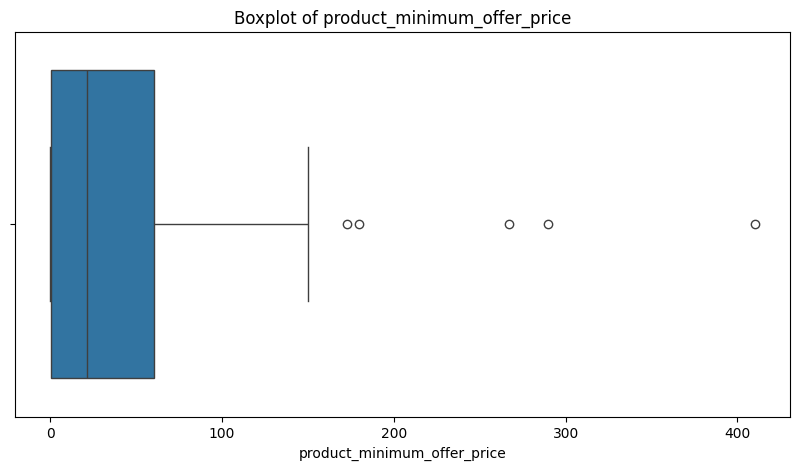

In [191]:
# 7. Create boxplots to check for outliers in numerical columns
for column in df.select_dtypes(exclude=['category']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

After analyzing the outliers in the dataset, we have decided to retain them as they represent valid data points that are relevant for subsequent evaluations.

## Data Visualization <a name="data-visualization"></a>
Data visualization is key to understanding trends and patterns in our data. In this cell, we will create various plots to visualize the relationships between different variables, including alcohol consumption and academic performance.

## Correlation Analysis <a name="correlation-analysis"></a>
We will analyze the correlations between numerical features in the dataset. This will help us identify which factors are most strongly related to alcohol consumption and academic performance.


## Data Preparation <a name="data-preparation"></a>
Before modeling, we need to prepare the data. This includes handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.

## Modeling <a name="modeling"></a>
In this section, we will build machine learning models to predict students' academic performance based on their alcohol consumption and other features. We will choose appropriate algorithms and fit them to our training data.

## Model Evaluation <a name="model-evaluation"></a>
After building our models, we will evaluate their performance using various metrics. We will compare the predictions against the actual outcomes to determine how well our models are performing.

## Conclusion and Next Steps <a name="conclusion-and-next-steps"></a>
In the final section, we will summarize our findings from the analysis and discuss potential next steps. This may include further analysis, model improvements, or recommendations for educators based on the insights gained from the data.